In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

In [2]:
import os
if not os.path.exists('user2movie.json') or \
   not os.path.exists('movie2user.json') or \
   not os.path.exists('usermovie2rating.json') or \
   not os.path.exists('usermovie2rating_test.json'):
   import preprocess2dict

In [3]:
with open ('user2movie.json','rb') as f:
    user2movie = pickle.load(f)
with open ('movie2user.json','rb') as f:
    movie2user = pickle.load(f)
with open ('usermovie2rating.json','rb') as f:
    usermovie2rating = pickle.load(f)
with open ('usermovie2rating_test.json','rb') as f:
    usermovie2rating_test = pickle.load(f)

In [4]:
N = np.max(list(user2movie.keys())) + 1 # number of users
m1 = np.max(list(movie2user.keys())) + 1 # number of movies
m2 = np.max([m for (u,m),r in usermovie2rating_test.items()])
M = max(m1, m2) + 1 # number of movies

In [5]:
K = 10
W = np.random.randn(N,K)
b = np.zeros(N)
U = np.random.randn(M,K)
c = np.zeros(M)
mu = np.mean(list(usermovie2rating.values()))

In [6]:
def get_loss(d):
    # d is a dictionary of (user_id, movie_id): rating
    N = float(len(d))
    sse = 0
    for k, r in d.items():
        u, m = k
        prediction = W[u].dot(U[m]) + b[u] + c[m] + mu
        sse += (r - prediction)**2 # sum of squared errors
    return sse / N # mean squared error

In [7]:
# train the parameters
epochs = 25
reg = 20 # regularization parameters
train_losses = []
test_losses = []
for epoch in range(epochs):
    print("epoch:", epoch)
    epoch_start = datetime.now()
    #perform updates

    #update W and b
    t0 = datetime.now()
    for i in range(N):
        matrix = np.eye(K) * reg
        vector = np.zeros(K)

        bi=0
        for j in user2movie[i]:
            r = usermovie2rating[(i,j)]
            matrix += np.outer(U[j],U[j])
            vector+= (r-b[i]-c[j]-mu)*U[j]
            bi+=(r-W[i].dot(U[j])-c[j]-mu)
            
        W[i]=np.linalg.solve(matrix,vector)
        b[i]=bi/(len(user2movie[i])+reg)

        if i% N//10 == 0:
            print("i:",i,"N:",N)
    print("updated W and b:", datetime.now() - t0)

    # for U and c
    t0 = datetime.now()

    for j in range(M):
        matrix = np.eye(K) * reg
        vector = np.zeros(K)

        cj=0
        # there are some movies that have no ratings, data issue
        try:
            for i in movie2user[j]:
                r = usermovie2rating[(i,j)]
                matrix += np.outer(W[i],W[i])
                vector += (r-b[i]-c[j]-mu)*W[i]
                cj+=(r-W[i].dot(U[j])-b[i]-mu)

            U[j]=np.linalg.solve(matrix,vector)
            c[j]=cj/(len(movie2user[j])+reg)

            if j% M//10 == 0:
                print("j:",j,"M:",M)
        except:
            pass
    print("updated U and c:", datetime.now() - t0)

    # calculate losses
    train_losses.append(get_loss(usermovie2rating))
    test_losses.append(get_loss(usermovie2rating_test))


epoch: 0
i: 0 N: 1000
i: 1 N: 1000
i: 2 N: 1000
i: 3 N: 1000
i: 4 N: 1000
i: 5 N: 1000
i: 6 N: 1000
i: 7 N: 1000
i: 8 N: 1000
i: 9 N: 1000
updated W and b: 0:00:01.693365
j: 0 M: 201
j: 1 M: 201
j: 2 M: 201
j: 3 M: 201
j: 4 M: 201
j: 5 M: 201
j: 6 M: 201
j: 7 M: 201
j: 8 M: 201
j: 9 M: 201
updated U and c: 0:00:01.305831
epoch: 1
i: 0 N: 1000
i: 1 N: 1000
i: 2 N: 1000
i: 3 N: 1000
i: 4 N: 1000
i: 5 N: 1000
i: 6 N: 1000
i: 7 N: 1000
i: 8 N: 1000
i: 9 N: 1000
updated W and b: 0:00:01.384579
j: 0 M: 201
j: 1 M: 201
j: 2 M: 201
j: 3 M: 201
j: 4 M: 201
j: 5 M: 201
j: 6 M: 201
j: 7 M: 201
j: 8 M: 201
j: 9 M: 201
updated U and c: 0:00:01.352768
epoch: 2
i: 0 N: 1000
i: 1 N: 1000
i: 2 N: 1000
i: 3 N: 1000
i: 4 N: 1000
i: 5 N: 1000
i: 6 N: 1000
i: 7 N: 1000
i: 8 N: 1000
i: 9 N: 1000
updated W and b: 0:00:01.371878
j: 0 M: 201
j: 1 M: 201
j: 2 M: 201
j: 3 M: 201
j: 4 M: 201
j: 5 M: 201
j: 6 M: 201
j: 7 M: 201
j: 8 M: 201
j: 9 M: 201
updated U and c: 0:00:01.331473
epoch: 3
i: 0 N: 1000
i: 1 N: 1

KeyboardInterrupt: 

In [67]:
# arr = np.array([1,2,3,4])
# arr2 = np.array([2,3,3])
# print(np.outer(arr,arr2))

# # np.outer(A,B) = A*B.T (matrix multiplication)
# # if A is a vector of length n, and B is a vector of length m
# # then np.outer(A,B) is an n x m matrix

In [9]:
# import numpy as np
# arr = np.array([[1,2,3],[2,3,4]])
# arr1 = np.array([[2,2,2],[1,1,1]])
# np.outer(arr,arr1)
   

array([[12,  6],
       [18,  9]])

In [12]:
print("train loss:", train_losses)
print("test loss:", test_losses)

train loss: [0.5586048945485768, 0.5119104305715015, 0.49603466083944137, 0.4887951803003621, 0.4855419744798687, 0.48390616829865246, 0.4829821893109753, 0.48242283059760915, 0.4820697146428962, 0.48184010383329784, 0.48168685823034935, 0.481581819584358, 0.4815077828467378, 0.4814540590622084, 0.48141392050912124, 0.48138306937084574, 0.48135871850901224, 0.48133903014858864, 0.48132277149962044, 0.4813091003246821, 0.4812974301137437, 0.4812873441141133, 0.4812785398839054, 0.48127079307309006, 0.4812639334969701]
test loss: [0.6025576149185706, 0.5713445769177262, 0.5619019918544811, 0.5578267947299415, 0.5557978110717413, 0.5546469129102782, 0.5539240529140111, 0.553438732502175, 0.5530962069566909, 0.5528454624793003, 0.5526568249542585, 0.5525119462569802, 0.5523988438132036, 0.5523093591698646, 0.5522377395677911, 0.5521798231737197, 0.5521325341475386, 0.5520935634107085, 0.5520611549644352, 0.5520339604152197, 0.5520109360411342, 0.5519912688537254, 0.5519743221820967, 0.5519

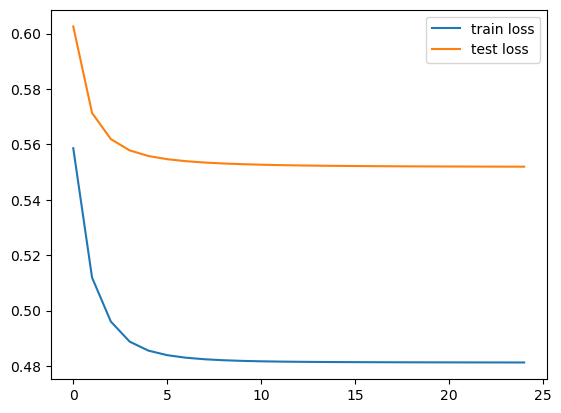

In [13]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()